<a href="https://colab.research.google.com/github/ReehanaDR/imagecompression/blob/main/emotiondetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fer

     |████████████████████████████████| 812 kB 5.0 MB/s 
     |████████████████████████████████| 2.3 MB 43.1 MB/s 


INFO:fer:15.01 fps, 334 frames, 22.26 seconds
INFO:fer:Making directories at output
100%|██████████| 334/334 [06:41<00:00,  1.20s/frames]
INFO:fer:Completed analysis: saved to output/WIN_20220414_21_47_51_Pro_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 14%
INFO:fer:Compressing: 29%
INFO:fer:Compressing: 44%
INFO:fer:Compressing: 59%
INFO:fer:Compressing: 74%
INFO:fer:Compressing: 89%
INFO:fer:Zip has finished


,Human Emotions,Emotion Value from the Video
0,Angry,8.84
1,Disgust,0.00
2,Fear,10.16
3,Happy,126.72
4,Sad,34.26
5,Surprise,55.79
6,Neutral,98.19


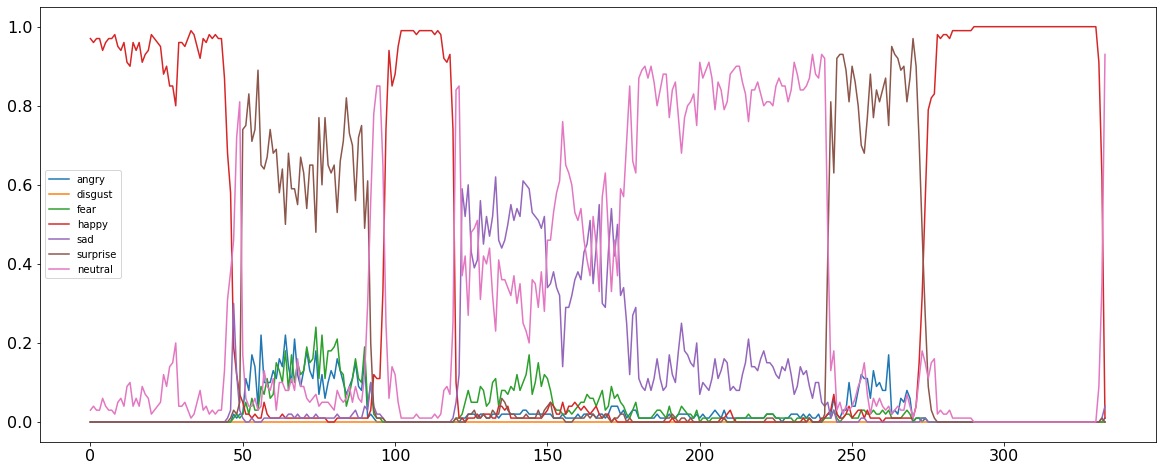

In [2]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

# Put in the location of the video file that has to be processed
location_videofile = "/content/WIN_20220414_21_47_51_Pro.mp4"

# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons